In [1]:
import yt
yt.set_log_level(40) 
import numpy as np
import pickle
import matplotlib.pyplot as plt

def grabFileSeries(scratchdirectory, fn, f0=0, step=1, width=5, 
                   basename="MPsimple", scratchPath="/mnt/gs21/scratch/freem386/"):
    """Returns a list of files with the form 
    <scratchPath>/<scratchdirectory>/<basename>.out2/#####.athdf,
    starting at f0, ending at fn with stepsize step.

    Args:
        scratchdirectory (str): Directory within scratchPath of desired files
        fn (int): final (stopping point) output number
        f0 (int, optional): initial output number. Defaults to 0.
        step (int, optional): output number step. Defaults to 1.
        width (int, optional): width of 0 in filenames. Defaults to 5.
        basename (str, optional): <basename>.out2.#####.athdf . Defaults to "MPsimple".
        scratchPath (str, optional): value stored in $SCRATCH. Defaults to "/mnt/gs21/scratch/freem386/".

    Returns:
        array[str]: List of filenames including paths
    """
    files = []
    for f in np.arange(f0, fn+1, step, dtype=int):
            files.append(scratchPath + scratchdirectory + basename + ".out2." + str(f).zfill(width) + ".athdf")
    return files


In [2]:
filehandler = open("lhlld2_stability.pkl", "rb")
pspace = pickle.load(filehandler)
filehandler.close()

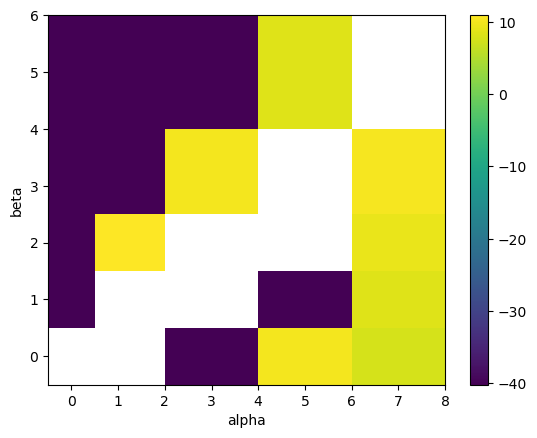

In [14]:
ind = {"ialpha": 0, "ibeta": 1, "ip": 2, "id": 3, "im": 4}
ti = 20

# Define the parameters you want to vary
alpha_values = [0, 1, 3, 5, 7]
beta_values = [0, 1, 2, 3, 5]
pcoeff_values = [1e-8, 1e-7, 1e-6]
d_values = [1.218085e-5, 1.218085e-4, 1.218085e-3]
b_values = [5e4, 5e5, 5e6] 

X, Y = np.meshgrid(alpha_values, beta_values)
plt.pcolormesh(X, Y, np.log(pspace[:, :, 0, 0, 0, 250]))

plt.xlabel("alpha")
plt.ylabel('beta')
plt.colorbar()

plt.show()